#1. 데이터 읽기

In [40]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [41]:
df_iris = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#2. 모델 만들기

##2.1 군집화 정보 확인

In [42]:
from sklearn.cluster import KMeans

# k개의 중심점 선정에 대한 문제를 해결한 k-means++ 사용
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=62)
kmeans.fit(df_iris)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

##2.2 기존 데이터와 비교

In [43]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

> 군집화를 통해 분류한 값과 기존 데이터의 차이에 대해 알아 보도록 하자.

In [44]:
df_iris['target'] = iris.target
df_iris['cluster'] = kmeans.labels_
df_iris.groupby(['target', 'cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

> 원본 데이터에서 분류한 0번과 새로 군집화한 1번 데이터가 50개로 동일한 것을 볼 수 있다. 원본 데이터의 1은 군집데이터에서 0번 두 개와 2번 48개로 적당히 분류되어 있는 것을 볼 수 있다. 마지막 데이터인 원본 2번이 군집 데이터 0번 36개, 2번 14개로 분류가 잘 안된 것을 볼 수 있다.

#3. 시각화

##3.1 표준화

In [45]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(iris.data)

##3.2 차원 축소

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris_scaled)
pca_transformed[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

##3.3 feature 추가

In [50]:
df_iris['pca_x'] = pca_transformed[:,0]
df_iris['pca_y'] = pca_transformed[:,1]
df_iris[:5]

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,1,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,1,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,1,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,1,-2.389842,0.646835


##3.4 시각화

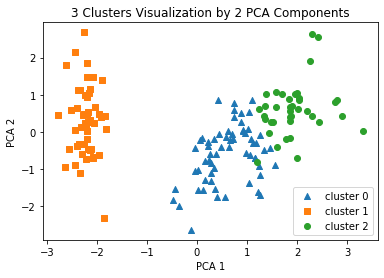

In [48]:
import matplotlib.pyplot as plt

markers=['^', 's', 'o']

for i, marker in enumerate(markers):
  x = df_iris[df_iris['cluster']==i]['pca_x']
  y = df_iris[df_iris['cluster']==i]['pca_y']
  plt.scatter(x=x, y=y, marker=marker) 

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.legend(('cluster 0', 'cluster 1', 'cluster 2'))
plt.show()

##3.5 index를 이용한 시각화

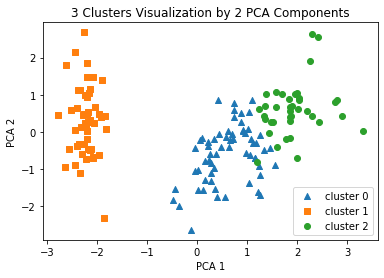

In [49]:
import matplotlib.pyplot as plt

markers=['^', 's', 'o']

for i, marker in enumerate(markers):
  marker_idx = df_iris[df_iris['cluster']==i].index
  plt.scatter(x=df_iris.loc[marker_idx,'pca_x'], y=df_iris.loc[marker_idx,'pca_y'], marker=marker) 

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.legend(('cluster 0', 'cluster 1', 'cluster 2'))
plt.show()